# Predicting Indonesian Population

## Import modules

In [43]:
# Base Modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# Errir rate
from sklearn.metrics import mean_squared_error

# Additions
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

## Problem

Forecast Indonesian Population

In [44]:
data = pd.read_csv('penduduk.csv')

In [45]:
data.head()

,Tahun,Tanggal,Pertumbuhan
0,1960,1960-12-31,87751066
1,1961,1961-12-31,90098396
2,1962,1962-12-31,92518373
3,1963,1963-12-31,95015295
4,1964,1964-12-31,97596728


## Use Specific Columns Only

In [46]:
df = data[['Tahun', 'Pertumbuhan']]

In [47]:
df.head()

,Tahun,Pertumbuhan
0,1960,87751066
1,1961,90098396
2,1962,92518373
3,1963,95015295
4,1964,97596728


## Convert Year so It Can be Used

In [49]:
df['Tahun'] = df['Tahun'].astype(str) + '-01-01'
df['Tahun'] = pd.to_datetime(df['Tahun'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype                                
---  ------       --------------  -----                                
 0   Tahun        61 non-null     datetime64[ns, pytz.FixedOffset(-60)]
 1   Pertumbuhan  61 non-null     int64                                
dtypes: datetime64[ns, pytz.FixedOffset(-60)](1), int64(1)
memory usage: 1.1 KB


In [51]:
df.head()

,Tahun,Pertumbuhan
0,1960-01-01 01:00:00-01:00,87751066
1,1961-01-01 01:00:00-01:00,90098396
2,1962-01-01 01:00:00-01:00,92518373
3,1963-01-01 01:00:00-01:00,95015295
4,1964-01-01 01:00:00-01:00,97596728


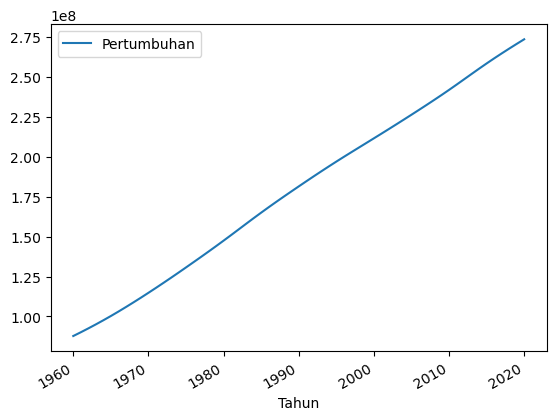

In [56]:
df.plot(x='Tahun', y='Pertumbuhan')
plt.show()

## Split data

In [57]:
len(df)

61

In [58]:
print(f"Panjang data: {len(df)}")
print(f"X_train: {np.round(len(df) * 0.8)}")
print(f"X_valid: {np.round(len(df) * 0.2)} ")

Panjang data: 61
X_train: 49.0
X_valid: 12.0 


In [59]:
df.tail()

,Tahun,Pertumbuhan
56,2016-01-01 01:00:00-01:00,261556386
57,2017-01-01 01:00:00-01:00,264650969
58,2018-01-01 01:00:00-01:00,267670549
59,2019-01-01 01:00:00-01:00,270625567
60,2020-01-01 01:00:00-01:00,273523621


In [62]:
X_train = df[df['Tahun'] < '2016-01-01']
X_valid = df[df['Tahun'] >= '2008-01-01']

print("X_train Shape", X_train.shape)
print("X_valid Shape", X_valid.shape)

X_train Shape (56, 2)
X_valid Shape (13, 2)


In [63]:
tahun = X_train[['Tahun', 'Pertumbuhan']]
tahun_v = X_valid[['Tahun', 'Pertumbuhan']]

In [64]:
tahun.set_index('Tahun', inplace=True)
tahun_v.set_index('Tahun', inplace=True)

In [ ]:
index_4_year = pd.date_range(tahun_v.index[-1], freq='AS', periods=4)
index_4_year

In [77]:
index_50_years = pd.date_range(tahun_v.index[-1], freq='AS', periods=50)

In [78]:
index_50_years

DatetimeIndex(['2020-01-01 01:00:00-01:00', '2021-01-01 01:00:00-01:00',
               '2022-01-01 01:00:00-01:00', '2023-01-01 01:00:00-01:00',
               '2024-01-01 01:00:00-01:00', '2025-01-01 01:00:00-01:00',
               '2026-01-01 01:00:00-01:00', '2027-01-01 01:00:00-01:00',
               '2028-01-01 01:00:00-01:00', '2029-01-01 01:00:00-01:00',
               '2030-01-01 01:00:00-01:00', '2031-01-01 01:00:00-01:00',
               '2032-01-01 01:00:00-01:00', '2033-01-01 01:00:00-01:00',
               '2034-01-01 01:00:00-01:00', '2035-01-01 01:00:00-01:00',
               '2036-01-01 01:00:00-01:00', '2037-01-01 01:00:00-01:00',
               '2038-01-01 01:00:00-01:00', '2039-01-01 01:00:00-01:00',
               '2040-01-01 01:00:00-01:00', '2041-01-01 01:00:00-01:00',
               '2042-01-01 01:00:00-01:00', '2043-01-01 01:00:00-01:00',
               '2044-01-01 01:00:00-01:00', '2045-01-01 01:00:00-01:00',
               '2046-01-01 01:00:00-01:00', '2047-0

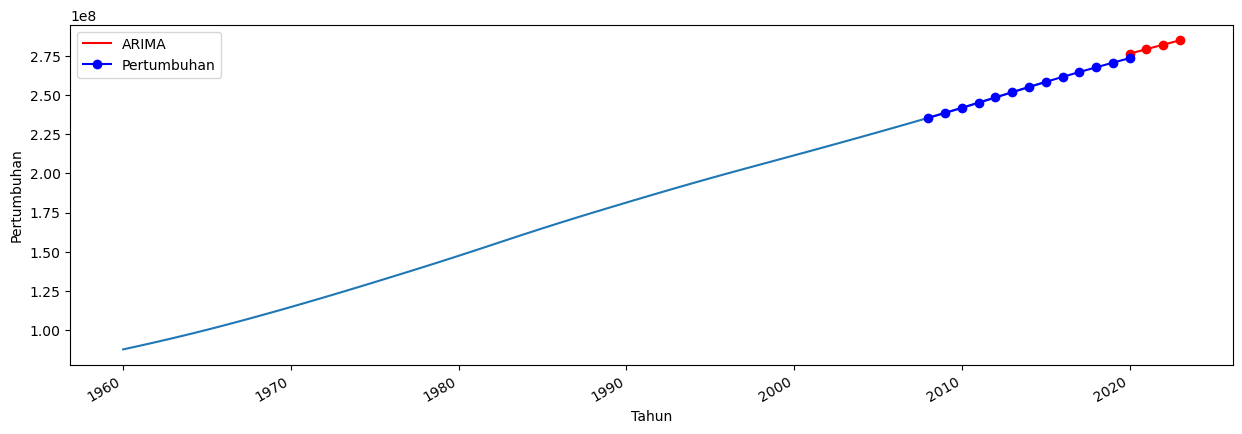

In [72]:
model_arima = ARIMA(tahun_v, order=(2,0,0))
model_arima_fit = model_arima.fit(disp=-1)

forecast = model_arima_fit.forecast(50)[0]

# Passing the same index for the forecasting
forecast = pd.Series(forecast, index=index_4_year)
forecast = forecast.rename("ARIMA")

# Plotting
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Tahun', y='Pertumbuhan', data=tahun)
forecast.plot(ax=ax, color='red', marker='o', legend=True)
tahun_v.plot(ax=ax, color='blue', marker='o', legend=True)
plt.show()

In [70]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
for param in pdq:
    try:
        model_arima = ARIMA(tahun, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2150.8120602317917
(0, 0, 1) 2082.0815211283348
(0, 0, 2) 2020.1808468640143
(0, 0, 3) 1952.9160103578918
(0, 0, 4) 1891.7505491817576
(0, 1, 0) 1536.2530536046695
(0, 1, 1) 1470.575253668912
(0, 2, 0) 1317.4380116237983
(0, 2, 1) 1254.4916928811417
(1, 0, 0) 1846.0788820430541
(1, 1, 0) 1355.1743492867968
(1, 2, 0) 1198.7500129745504
(2, 1, 0) 1218.0140003001272
(2, 1, 3) 1130.399752180157
(2, 2, 0) 1125.2703065186179
(2, 2, 1) 1109.058030590442
(2, 2, 2) 1096.8820759679584
(2, 2, 3) 1098.759475046179
(2, 2, 4) 1086.7374694630435
(3, 1, 0) 1158.1890256081708
(3, 1, 1) 1139.9208364649826
(3, 1, 2) 1127.6425904277958
(3, 1, 3) 1128.7496726250718
(3, 1, 4) 1118.479685584998
(3, 2, 0) 1095.6389432885007
(3, 2, 1) 1097.5490510464765
(3, 2, 2) 1099.2894293079685
(3, 2, 3) 1101.674463724768
(4, 1, 0) 1126.3249098948997
(4, 1, 1) 1130.148382376058
(4, 1, 2) 1132.9453563901295
(4, 1, 3) 1136.8943407914578
(4, 2, 0) 1097.5202831186068
(4, 2, 2) 1083.4078174057142
(4, 2, 3) 1083.816987

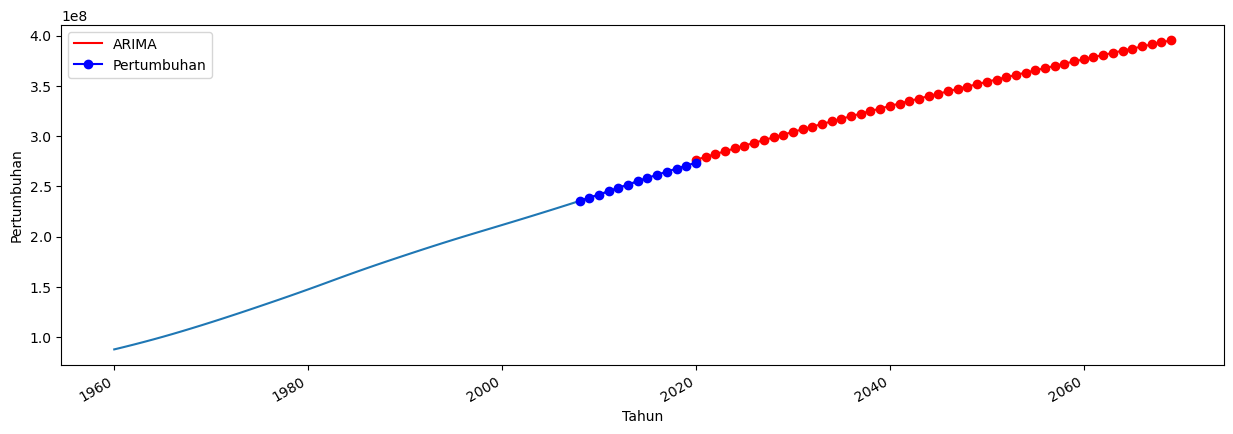

In [82]:
model_arima = ARIMA(tahun_v, order=(2,0,0))
model_arima_fit = model_arima.fit(disp=-1)

forecast = model_arima_fit.forecast(50)[0]

# Passing the same index for the forecasting
forecast = pd.Series(forecast, index=index_50_years)
forecast = forecast.rename("ARIMA")

# Plotting
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Tahun', y='Pertumbuhan', data=tahun)
forecast.plot(ax=ax, color='red', marker='o', legend=True)
tahun_v.plot(ax=ax, color='blue', marker='o', legend=True)
plt.show()

## Concat the Result

In [83]:
df.shape

(61, 2)

In [84]:
df_fcast = forecast.to_frame()

In [85]:
df_fcast.shape

(50, 1)

In [86]:
df.head()

,Tahun,Pertumbuhan
0,1960-01-01 01:00:00-01:00,87751066
1,1961-01-01 01:00:00-01:00,90098396
2,1962-01-01 01:00:00-01:00,92518373
3,1963-01-01 01:00:00-01:00,95015295
4,1964-01-01 01:00:00-01:00,97596728


In [101]:
df.set_index("Tahun", inplace=True)

In [102]:
df_fcast.head()

,Pertumbuhan
2020-01-01 01:00:00-01:00,2.764014e+08
2021-01-01 01:00:00-01:00,2.792590e+08
2022-01-01 01:00:00-01:00,2.820967e+08
2023-01-01 01:00:00-01:00,2.849145e+08
2024-01-01 01:00:00-01:00,2.877125e+08


In [103]:
df_fcast.rename(columns=({"ARIMA":"Pertumbuhan"}), inplace=True)

In [104]:
output_df = pd.DataFrame()

In [105]:
output_df = pd.concat([df, df_fcast], axis=0)

In [106]:
output_df.head()

,Pertumbuhan
1960-01-01 01:00:00-01:00,87751066.0
1961-01-01 01:00:00-01:00,90098396.0
1962-01-01 01:00:00-01:00,92518373.0
1963-01-01 01:00:00-01:00,95015295.0
1964-01-01 01:00:00-01:00,97596728.0


In [107]:
output_df.rename_axis("Tahun", inplace=True)

In [108]:
output_df.tail()

,Pertumbuhan
Tahun,
2065-01-01 01:00:00-01:00,3.870453e+08
2066-01-01 01:00:00-01:00,3.891286e+08
2067-01-01 01:00:00-01:00,3.911974e+08
2068-01-01 01:00:00-01:00,3.932516e+08
2069-01-01 01:00:00-01:00,3.952915e+08


In [110]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 1960-01-01 01:00:00-01:00 to 2069-01-01 01:00:00-01:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pertumbuhan  111 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [113]:
output_df

,Pertumbuhan
Tahun,
1960-01-01 01:00:00-01:00,8.775107e+07
1961-01-01 01:00:00-01:00,9.009840e+07
1962-01-01 01:00:00-01:00,9.251837e+07
1963-01-01 01:00:00-01:00,9.501530e+07
1964-01-01 01:00:00-01:00,9.759673e+07
...,...
2065-01-01 01:00:00-01:00,3.870453e+08
2066-01-01 01:00:00-01:00,3.891286e+08
2067-01-01 01:00:00-01:00,3.911974e+08


In [117]:
output_df.reset_index(inplace=True)

In [118]:
output_df.head()

,Tahun,Pertumbuhan
0,1960-01-01 01:00:00-01:00,87751066.0
1,1961-01-01 01:00:00-01:00,90098396.0
2,1962-01-01 01:00:00-01:00,92518373.0
3,1963-01-01 01:00:00-01:00,95015295.0
4,1964-01-01 01:00:00-01:00,97596728.0


In [124]:
output_df['Tahun'] = output_df['Tahun'].dt.strftime("%Y")

In [126]:
output_df.set_index("Tahun", inplace=True)

In [128]:
output_df.to_csv("Pertumbuhan_50_Tahun.csv")